# Capstone Project - Credit Card Fraud Detection

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

# sci-kit algos
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("datasets/creditcard.csv")

### Exploratory Data Analysis

In [38]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data Summary Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As can be seen fromt he information above, all the columns are numeric data types with largely float values except the target variable (Class), which is of int type.

Additionally, there are no missing values in the data, which presents an advantage in subsequent data preparation.

In [59]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Some observations based on the summary statistics:
- Many of the hidden attributes (V1-V28) have negative values as well
- The minimum transaction amount is zero units with a mean of around 88 units
- The max value for the Time attribute is 172792 seconds (2 years)

#### Class Imbalance Observation

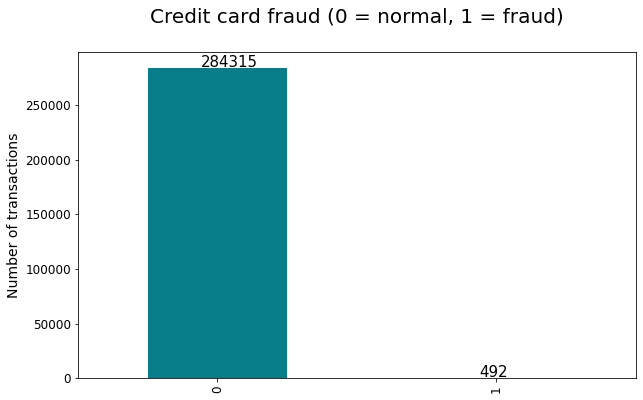

In [64]:
# Visualizing categorical data
ax = data['Class'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=12, color='#087E8B')
ax.set_title('Credit card fraud (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

There is a clear imbalance in the target classes within the dataset, as stated in the description of the dataset. This will be addressed in the feature engineering stage of the project.

#### Missing Value and Data Accuracy Checks

In [65]:
# Checking Unique values for Class variable
data['Class'].unique()

array([0, 1], dtype=int64)

We can thus confirm that the Class atrtribute indeed has only two values (1 and 0).

In [7]:
# Checking missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

None of the attributes contains missing values, as previously discovered using the info() method.

#### Univariate Analysis

In [161]:
# Visualizing ranges of amounts
fraud_amnt = data['Amount'][data['Class'] == 1]
ok_amnt = data['Amount'][data['Class'] == 0]

min_fraud_amnt = fraud_amnt.min()
max_fraud_amnt = fraud_amnt.max()
min_ok_amnt = ok_amnt.min()
max_ok_amnt = ok_amnt.max()

cut_fr = (max_fraud_amnt - min_fraud_amnt)//5
cut_ok = (max_ok_amnt - min_ok_amnt)//5

r1_fr = str(min_fraud_amnt) + "----" + str(min_fraud_amnt + cut_fr)
r2_fr = str(min_fraud_amnt + cut_fr) + "----" + str(min_fraud_amnt + 2*cut_fr)
r3_fr = str(min_fraud_amnt + 2*cut_fr) + "----" + str(min_fraud_amnt + 3*cut_fr)
r4_fr = str(min_fraud_amnt + 3*cut_fr) + "----" + str(min_fraud_amnt + 4*cut_fr)
r5_fr = str(min_fraud_amnt + 4*cut_fr) + "----" + str(max_fraud_amnt)
r1_ok = str(min_ok_amnt) + "----" + str(min_fraud_amnt + cut_fr)
r2_ok = str(min_ok_amnt + cut_ok) + "----" + str(min_ok_amnt + 2*cut_ok)
r3_ok = str(min_ok_amnt + 2*cut_ok) + "----" + str(min_ok_amnt + 3*cut_ok)
r4_ok = str(min_ok_amnt + 3*cut_ok) + "----" + str(min_ok_amnt + 4*cut_ok)
r5_ok = str(min_ok_amnt + 4*cut_ok) + "----" + str(max_ok_amnt)

sorted_fr = fraud_amnt.sort_values(ascending=True)
sorted_ok = ok_amnt.sort_values(ascending=True)

fraud_amnt_ranges = pd.qcut(sorted_fr, q=5, labels = [r1_fr,r2_fr,r3_fr,r4_fr,r5_fr])
ok_amnt_ranges = pd.qcut(sorted_ok, q=5, labels = [r1_ok,r2_ok,r3_ok,r4_ok,r5_ok])

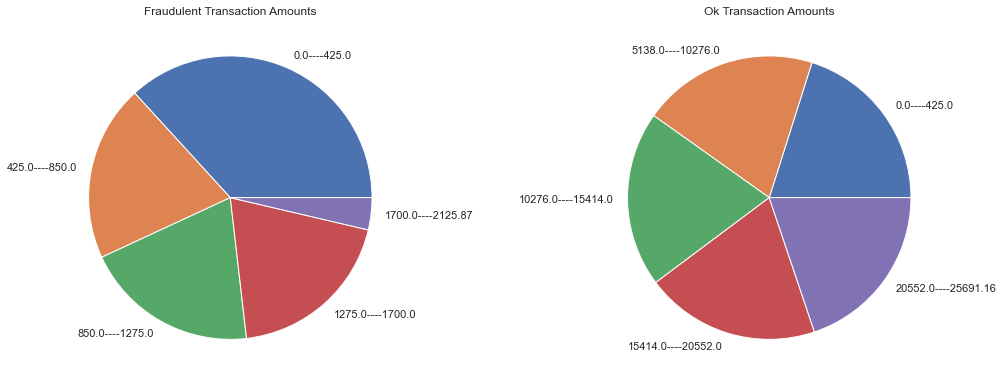

In [196]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15)) #ax1,ax2 refer to your two pies

ax1.pie(fraud_amnt_ranges.value_counts(), labels=[r1_fr,r2_fr,r3_fr,r4_fr,r5_fr])
ax1.set_title('Fraudulent Transaction Amounts')

ax2.pie(ok_amnt_ranges.value_counts(), labels=[r1_ok,r2_ok,r3_ok,r4_ok,r5_ok])
ax2.set_title('Ok Transaction Amounts')

fig.tight_layout(pad=4.0)

As we can see from the above pie charts, fraudulent transactions are more frequent for lower amount ranges.

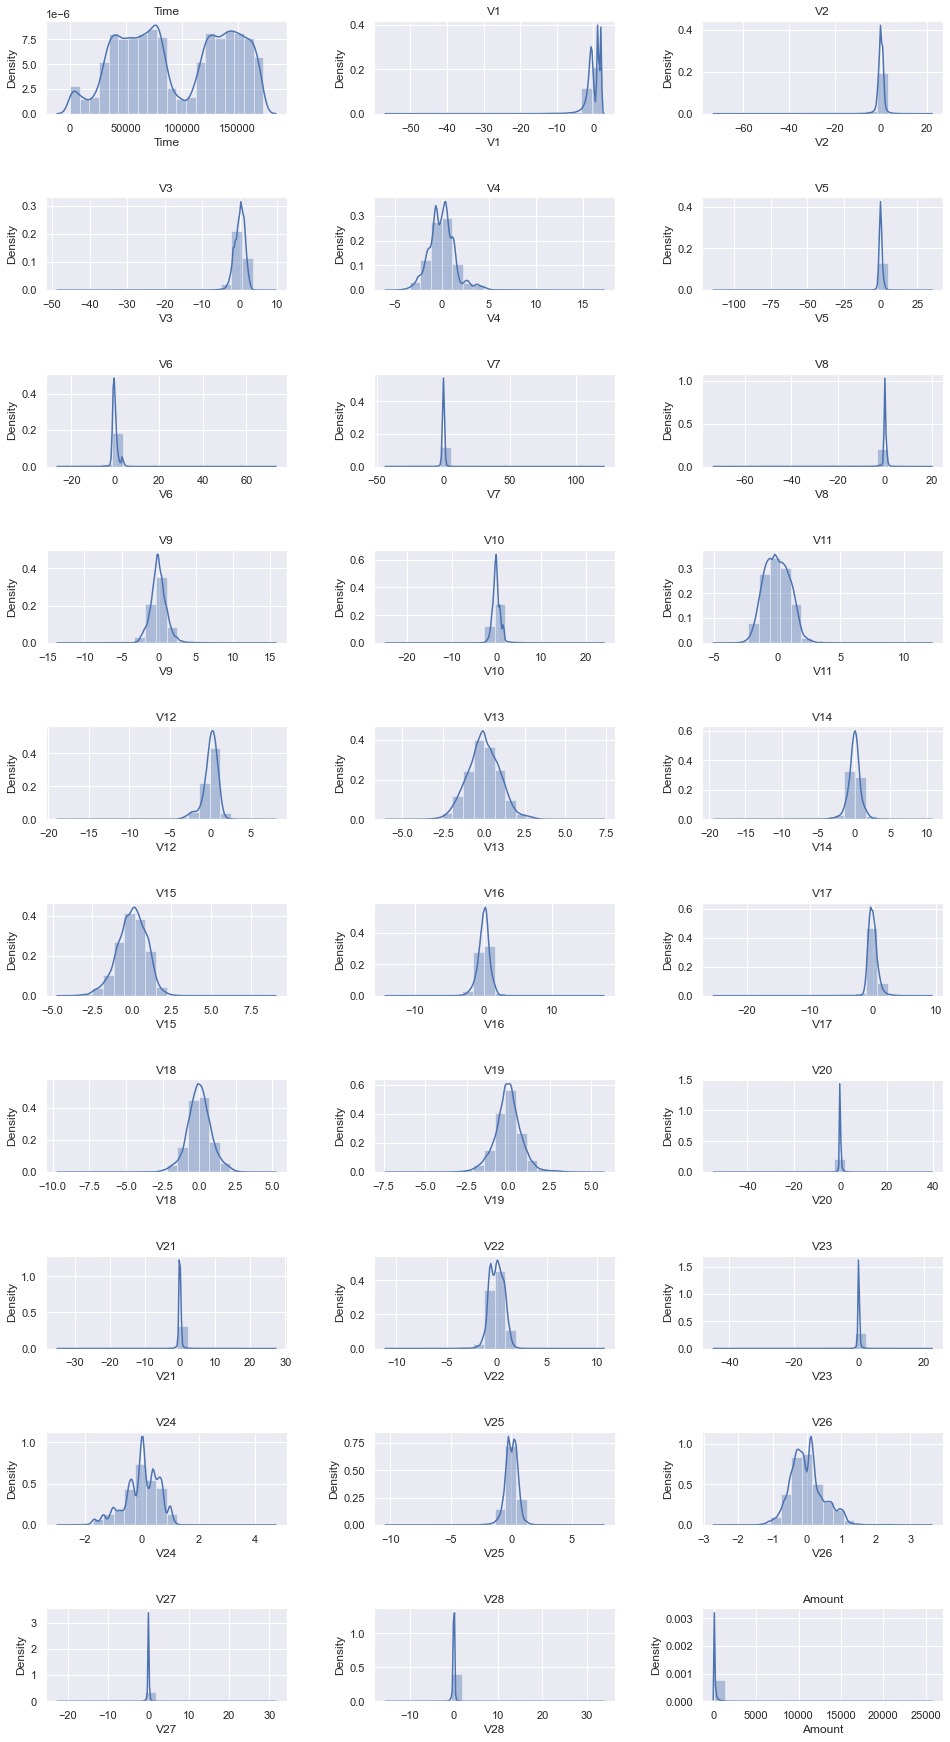

In [68]:
# Distribution plots
fig, axes = plt.subplots(ncols=3, nrows=10)

for col, ax in zip(data.columns, axes.flat):
    sns.distplot(data[col], bins=20, ax=ax)
    ax.set_title(col)
    fig.tight_layout(pad=3.0)
plt.show()

<AxesSubplot:ylabel='Density'>

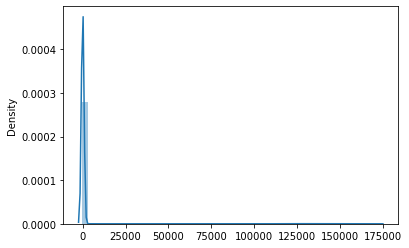

In [69]:
sns.distplot(data)

As can be seen form the plots above as well as the summary from the describe() method, a lot of the hidden variables are near zero-mean. Also of note is that the 'Amount' variable has a considerable rightward skew, indicating outlying data points, with most of the transaction amounts centered towards the low hundreds (mean is around 88 units).

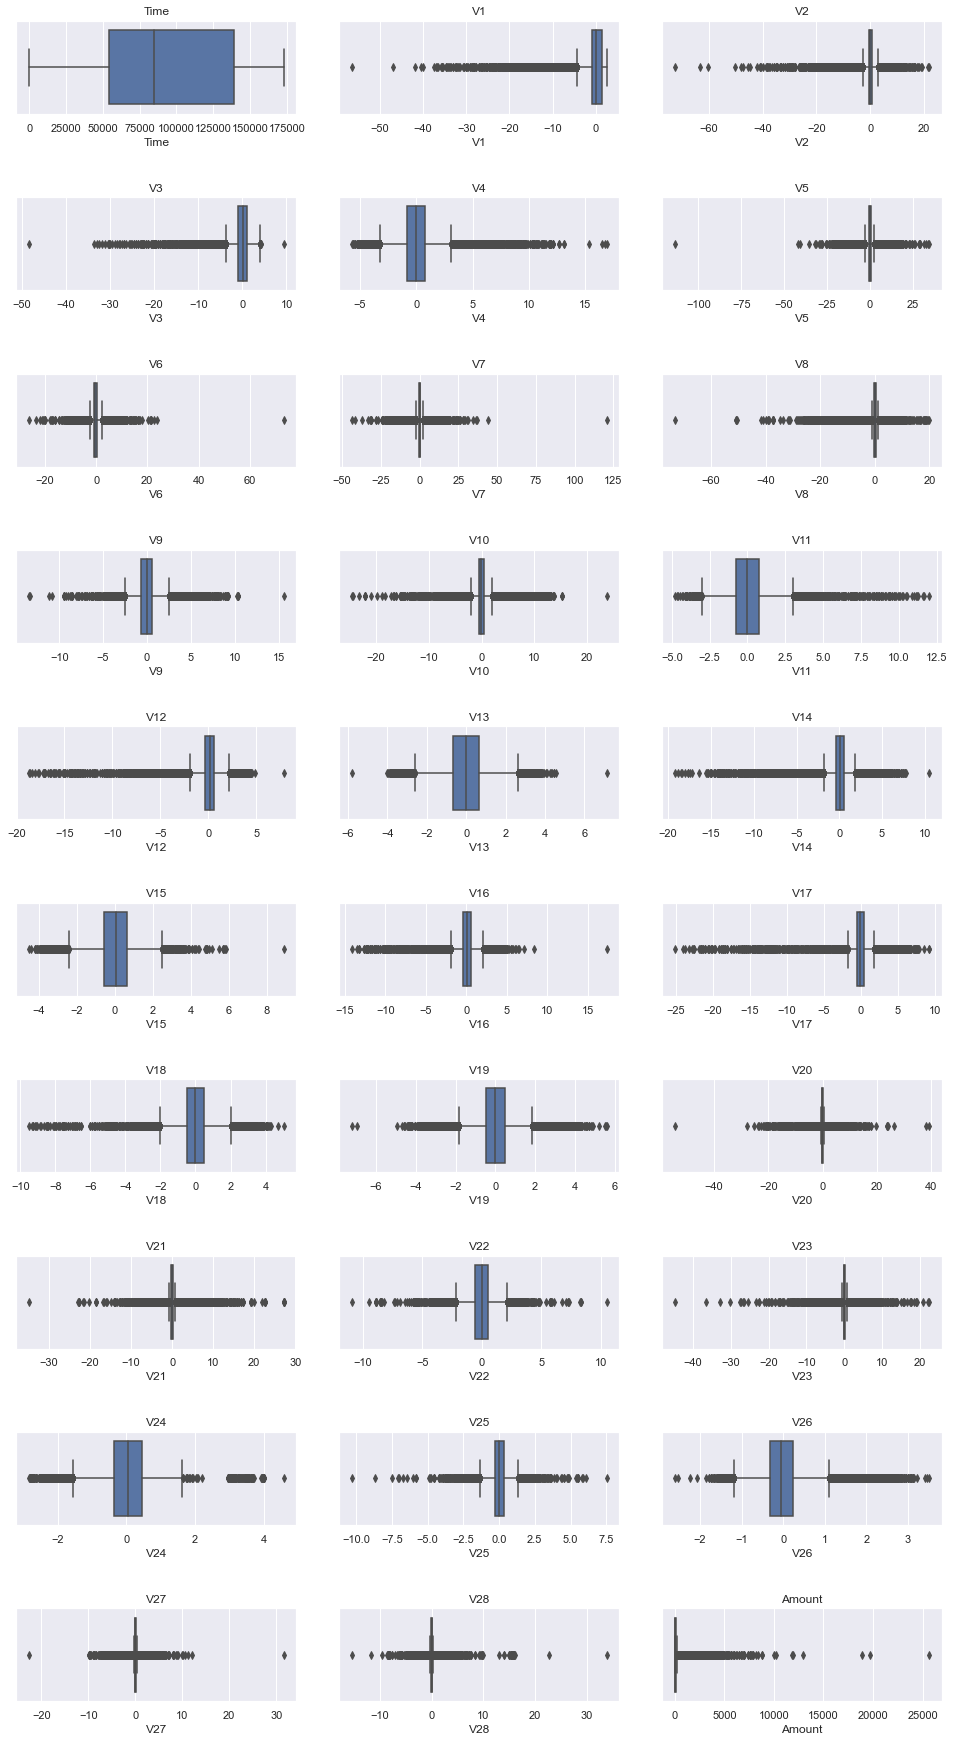

In [78]:
# Box plots
fig, axes = plt.subplots(ncols=3, nrows=10)

for col, ax in zip(data.columns, axes.flat):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(col)
    fig.tight_layout(pad=3.0)
plt.show()

As is evident form the box plots, many of the near-zero mean variables have considerable amounts of outlying values that extend ebyond the upper and lower quartiles.

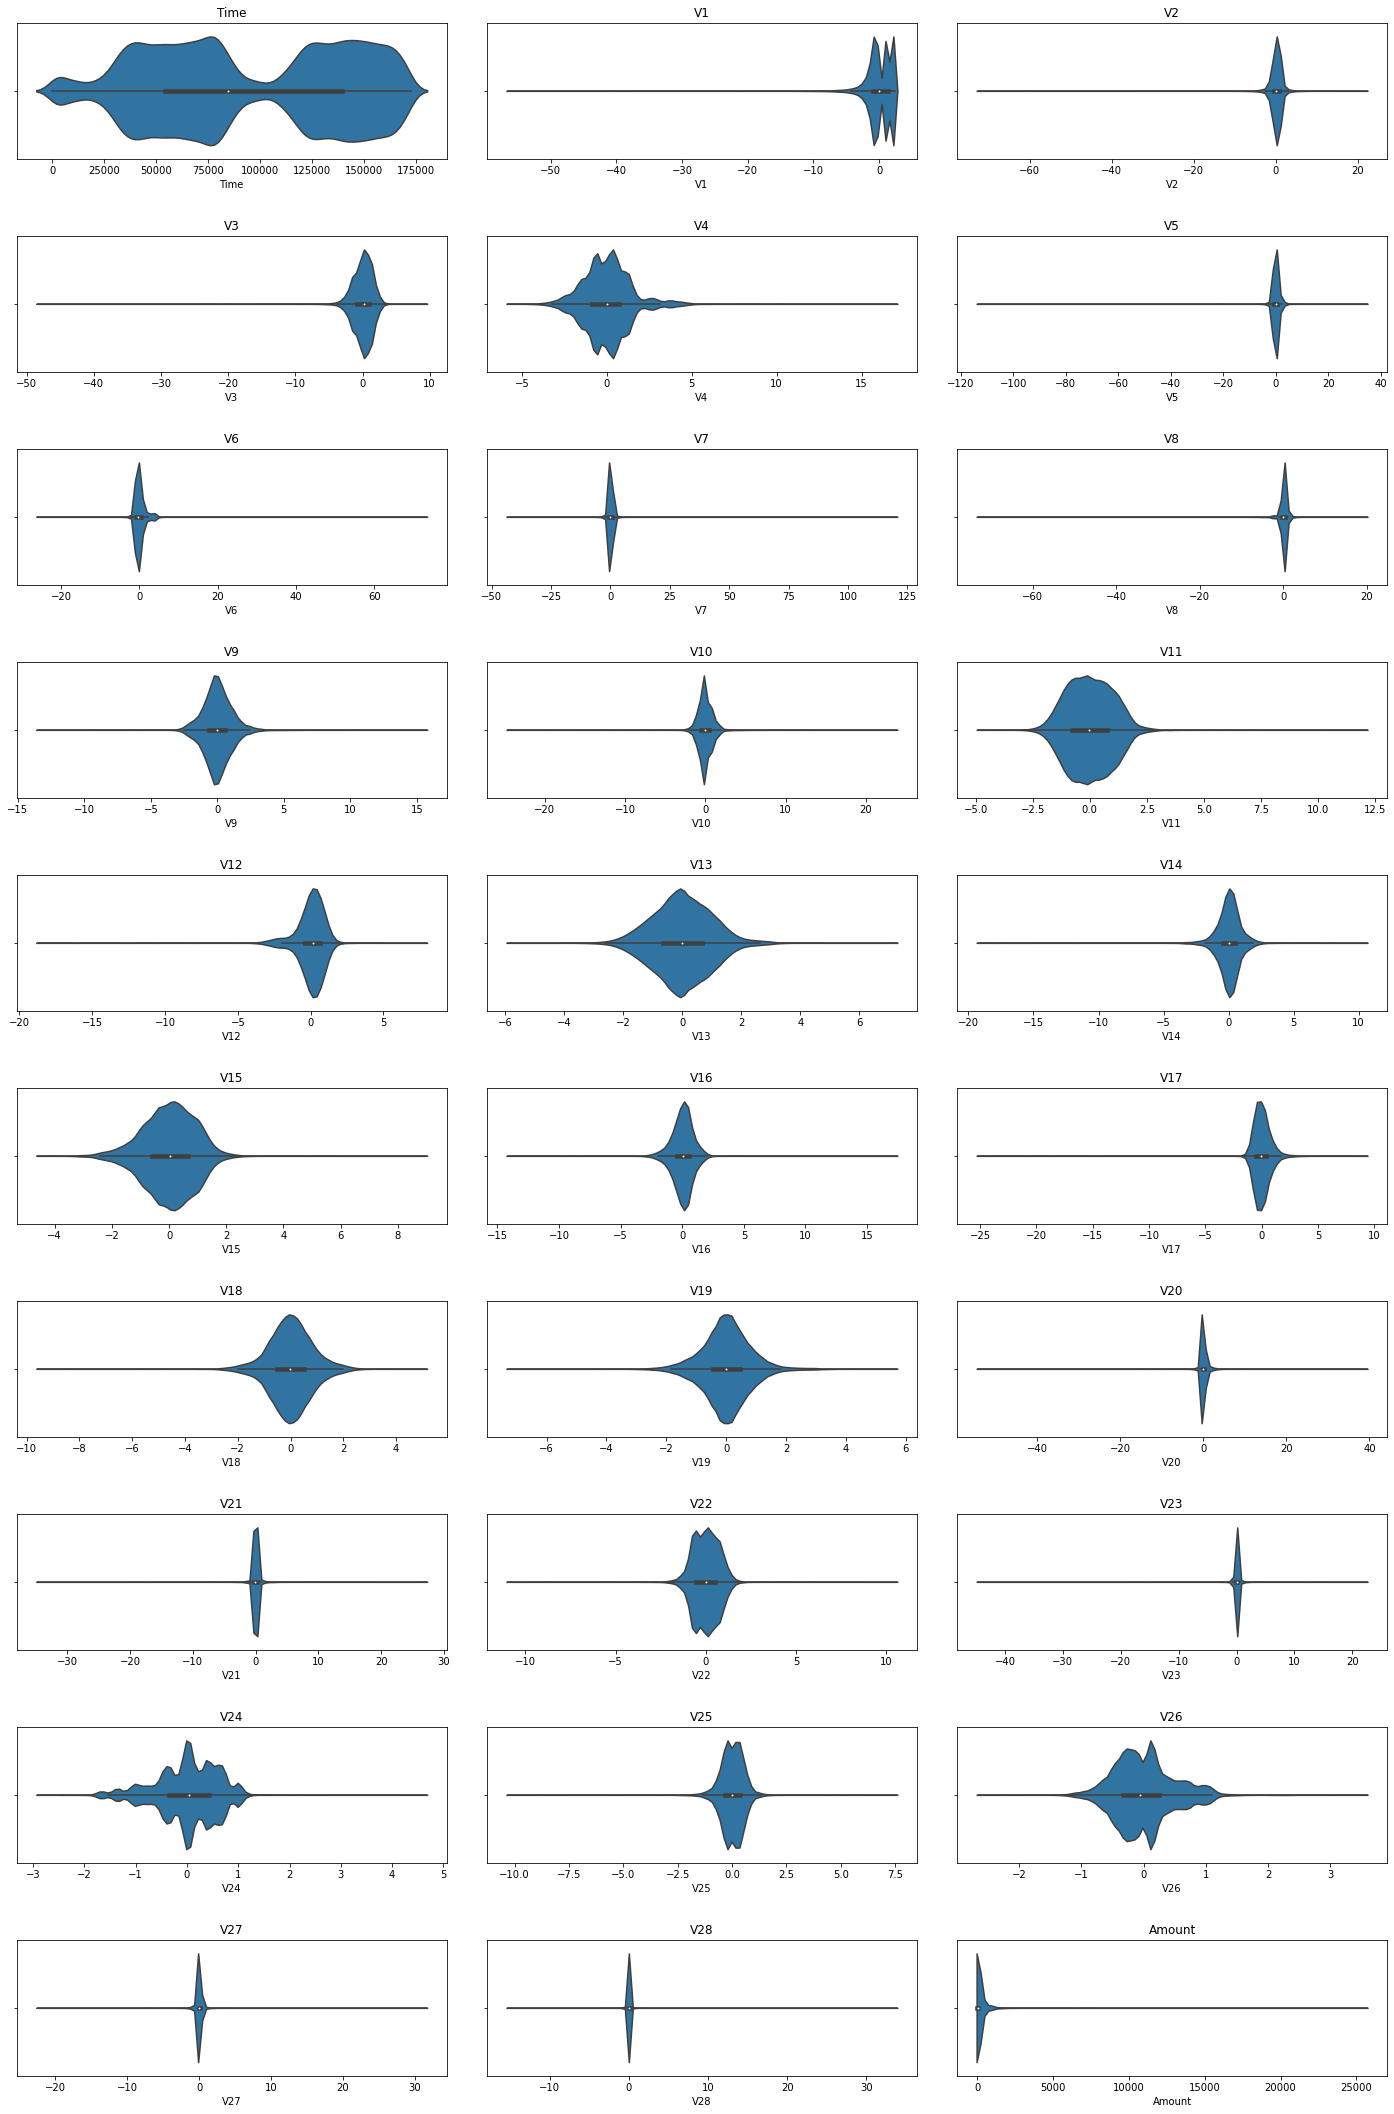

In [85]:
# Violin Plots
plt.rcParams["figure.figsize"] = (20,30)
fig, axes = plt.subplots(ncols=3, nrows=10)
for col, ax in zip(data.columns, axes.flat):
    sns.violinplot(x=data[col], ax=ax)
    ax.set_title(col)
    fig.tight_layout(pad=3.0)
plt.show()

The violin plot above gives a better visualization of the spread of values of the different attributes in the dataframe. Of note, are the outlying values in the V1-V28 variables with little spread, indicating concentrated values, which are largely spread about near the zero mark.

#### Bivariate Analysis

<AxesSubplot:xlabel='Amount', ylabel='Class'>

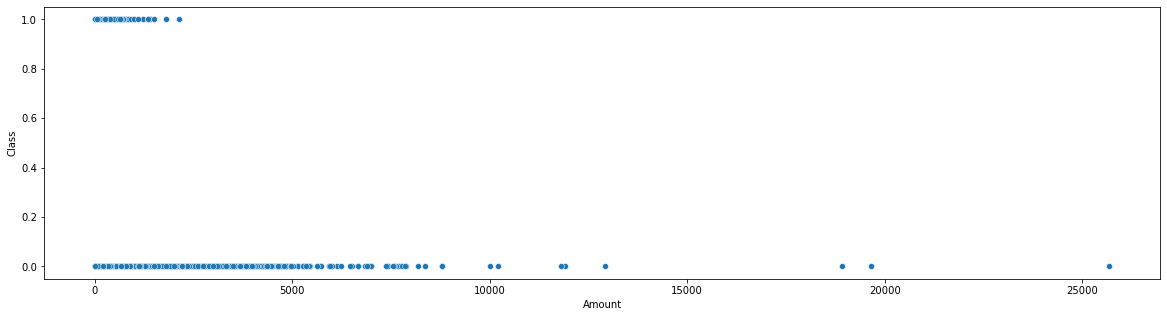

In [3]:
# Comparison of amounts for fraudulent and normal transactions
fig = plt.figure(figsize = (20,5))
sns.scatterplot(y=data['Class'], x=data['Amount'])

We can observe that the fraudulent cases were mostly observed for lower amounts.

In [4]:
fraud_amnts = data['Amount'][data['Class'] == 1]
ok_amnts = data['Amount'][data['Class'] == 0]

In [5]:
fraud_amnts.max()

2125.87

Text(0.5, 0.98, 'Non-fraudulent Amounts vs Time')

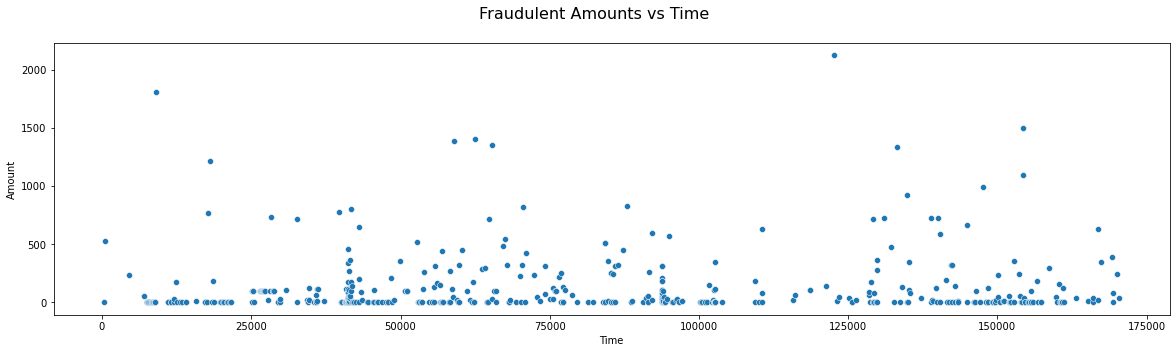

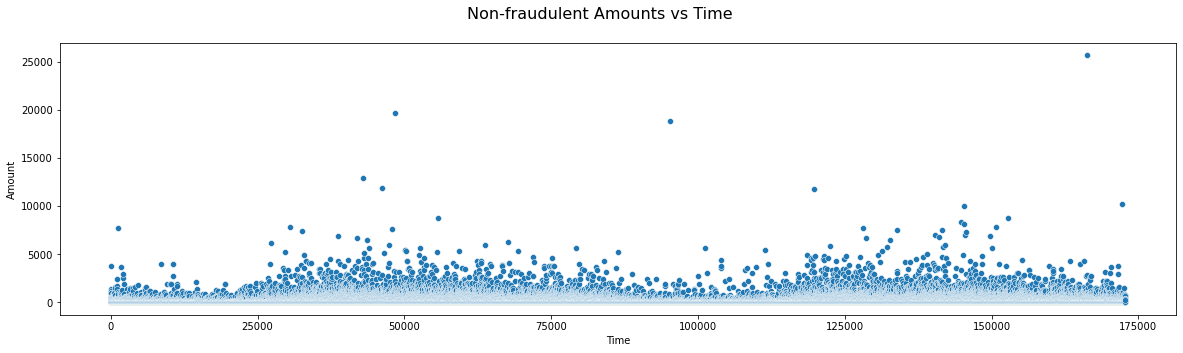

In [6]:
# Scatterplot for fraud amounts
fig = plt.figure(figsize = (20,5))
sns.scatterplot(y=fraud_amnts,x=data['Time'])
fig.suptitle('Fraudulent Amounts vs Time', fontsize=16)

fig = plt.figure(figsize = (20,5))
sns.scatterplot(y=ok_amnts,x=data['Time'])
fig.suptitle('Non-fraudulent Amounts vs Time', fontsize=16)

Fraudulent transactions spread over entire time period (2 days), mostly towards lower amounts.

<AxesSubplot:>

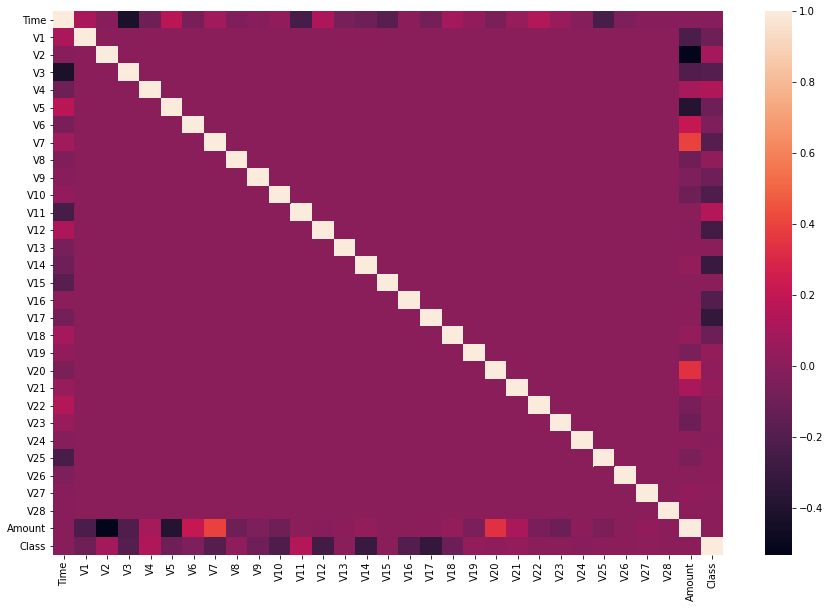

In [7]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.corr(), ax=ax)

As can be seen from the heatmap, each of the attributes, V1 - V28 have negligible correlation with each other.

#### Normalizing Dataset

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
target = data['Class']
attrs = data.drop('Class', axis=1)

In [5]:
cols = attrs.columns
x = attrs.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=cols)
data['Class'] = target

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


### Feature Engineering

#### Feature Selection using Random Forest

In [7]:
y = data['Class']
X = data.drop(['Class'],axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [9]:
mod = RandomForestClassifier()
mod.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
importances = mod.feature_importances_

In [11]:
sorted_indices = np.argsort(importances)[::-1]

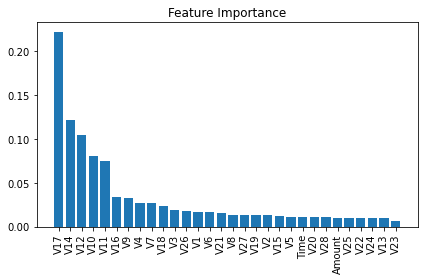

In [12]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Based on the above result, we can select certain features based on relative importance.

In [13]:
data.drop(['V2','V22','V5','V28','V24','V25','V13','V8','V23','Amount','V15','V27','V19'],axis=1, inplace=True)

#### SMOTE technique for data imbalance treatment

In [14]:
X = data.drop('Class', axis=1)
y = data['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [16]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 0.18
% Positive class in Test  = 0.16


In [17]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [18]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (284807, 17)
Shape of X after SMOTE: (568630, 17)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Class, dtype: float64

#### Helper Functions

In [19]:
def class_report(model,x_test,y_test):
    prediction_test = model.predict(x_test)
    # Print the prediction accuracy
    accuracy = accuracy_score(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test, target_names = ['0','1'])
    probs = model.predict_proba(x_test)[:,1]
    auc = roc_auc_score(y_test, probs)

    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Classification report:" "\n", classification)
    print('AUC: %.3f' % auc)

def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(type(model).__name__)
    plt.show()

class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#### Train-test split of SMOTE treated data

In [20]:
# new train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

### Model Building

#### Logistic Regression

In [23]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

Evaluation Metrics
Training Accuracy = 0.94
Test Accuracy = 0.94
Recall = 0.91
Precision = 0.98


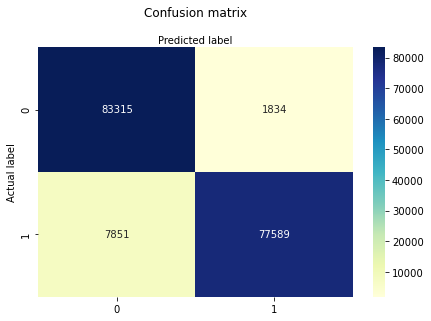

In [24]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

In [25]:
class_report(model, X_test, y_test)

============================== Model Evaluation ==============================
Classifier : LogisticRegression(random_state=42)

 Model Accuracy:
 0.9432261165725809

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     85149
           1       0.98      0.91      0.94     85440

    accuracy                           0.94    170589
   macro avg       0.95      0.94      0.94    170589
weighted avg       0.95      0.94      0.94    170589

AUC: 0.986


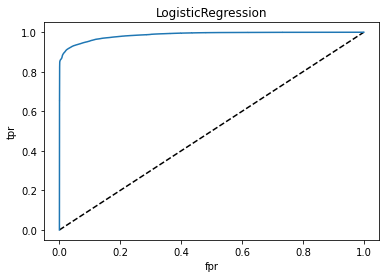

In [26]:
plot_roc(model, X_test, y_test)

#### K Nearest Neighbors

In [27]:
# increase n enighbors to avoid overfitting
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

Evaluation Metrics
Training Accuracy = 1.00
Test Accuracy = 1.00
Recall = 1.00
Precision = 1.00


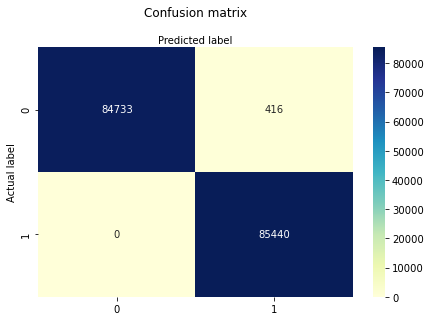

In [28]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

============================== Model Evaluation ==============================
Classifier : KNeighborsClassifier(n_neighbors=9)

 Model Accuracy:
 0.9975613902420437

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC: 1.000


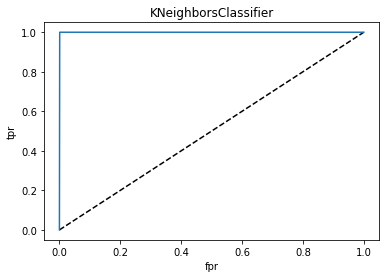

In [29]:
class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

It is noted that even with higher values of n_neighbors, the KNN model appears to overfit as evidenced by the above results.

#### Naive Bayes Classifier

In [20]:
model = GaussianNB()
model.fit(X_train, y_train)
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

Evaluation Metrics
Training Accuracy = 0.92
Test Accuracy = 0.92
Recall = 0.85
Precision = 0.98


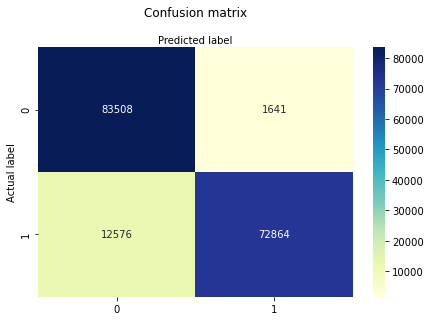

In [21]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

============================== Model Evaluation ==============================
Classifier : GaussianNB()

 Model Accuracy:
 0.9166593391133074

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     85149
           1       0.98      0.85      0.91     85440

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589

AUC: 0.957


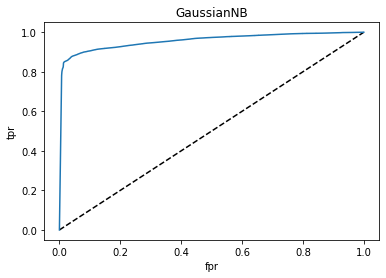

In [22]:
class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

#### Decision Tree

In [23]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=6)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Evaluation Metrics
Training Accuracy = 0.92
Test Accuracy = 0.92
Recall = 0.85
Precision = 0.98


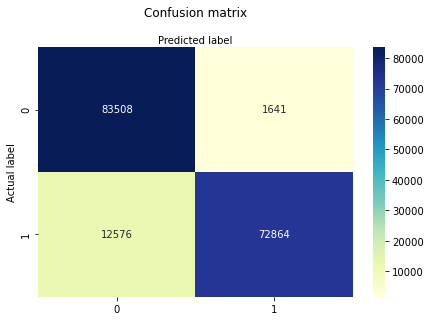

In [24]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

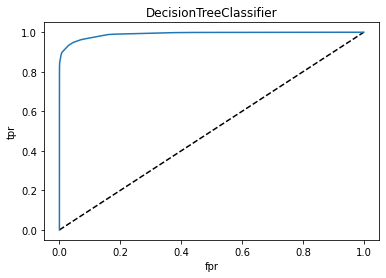

In [25]:
# class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

#### SVM

In [ ]:
model = SVC(probability=True)
model.fit(X_train, y_train) 
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

In [ ]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

In [ ]:
# class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

#### ANN


In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train) 
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

Evaluation Metrics
Training Accuracy = 1.00
Test Accuracy = 1.00
Recall = 1.00
Precision = 0.99


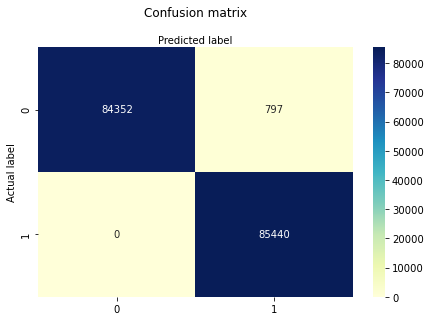

In [16]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

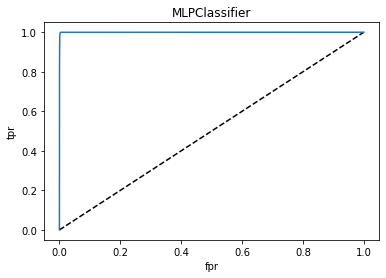

In [17]:
# class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

#### Adaboost

In [21]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

Evaluation Metrics
Training Accuracy = 0.96
Test Accuracy = 0.96
Recall = 0.95
Precision = 0.97


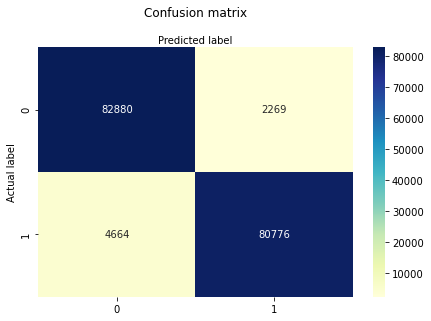

In [22]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

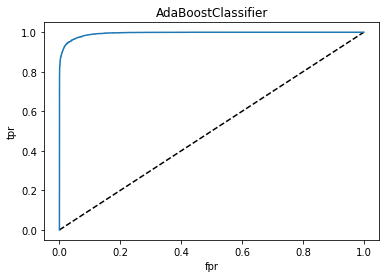

In [23]:
# class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

#### Gradient Boosting

In [24]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
preds_tst = model.predict(X_test)
preds_trn = model.predict(X_train)

Evaluation Metrics
Training Accuracy = 0.97
Test Accuracy = 0.97
Recall = 0.96
Precision = 0.98


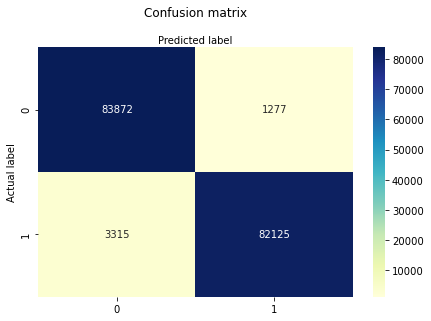

In [25]:
print('Evaluation Metrics')
print(f'Training Accuracy = {accuracy_score(y_train, preds_trn):.2f}')
print(f'Test Accuracy = {accuracy_score(y_test, preds_tst):.2f}')
print(f'Recall = {recall_score(y_test, preds_tst):.2f}')
print(f'Precision = {precision_score(y_test, preds_tst):.2f}')

plot_conf_matrix(y_test, preds_tst, class_names)

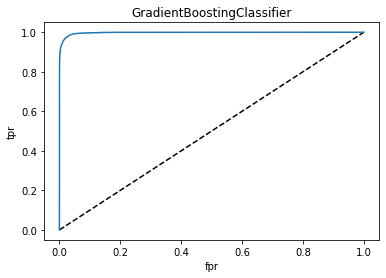

In [26]:
# class_report(model, X_test, y_test)
plot_roc(model, X_test, y_test) 

### Results and Conclusion

#### Tabe of Results

In [5]:
results = [['Model','Test Acc.', 'Train Acc.', 'Precision', 'Recall'],
      ['Logistic Regression', '0.94', '0.94','0.98','0.91'],
      ['Naive Bayes', '0.92', '0.92','0.98','0.85'],
      ['Decision Tree', '0.92', '0.99','0.98','0.85'],
      ['Adaboost', '0.96', '0.96','0.97','0.95'],
      ['Gradient Boost', '0.97', '0.97','0.98','0.96'],
      ]
print(tabulate(results))

-------------------  ---------  ----------  ---------  ------
Model                Test Acc.  Train Acc.  Precision  Recall
Logistic Regression  0.94       0.94        0.98       0.91
Naive Bayes          0.92       0.92        0.98       0.85
Decision Tree        0.92       0.99        0.98       0.85
Adaboost             0.96       0.96        0.97       0.95
Gradient Boost       0.97       0.97        0.98       0.96
-------------------  ---------  ----------  ---------  ------


Note that the results for KNN and ANN are not included due to overfitting so they appear as 1.0 in all categories.

The table shows relatively high evaluation metrics for all the models with Gradient Boost performing the best in terms of on terms of test accuracy. It also yields the highest precision alongside logistic regression, Naive Bayes and decision tree. Gradient Boost also yields the highest recall score.

#### Comments

The hyperparameters of the various models were tuned to check if they yielded any significant changes on the evaluation scores. However, the results yielded extremely minor differences and hence these have not been included. Another aspect of note is that utilziing techniques to find the best parameters such as Grid Search often yielded long running times which would necessitate the requirement of high compute resources or some kind of cloud service to compute heavy calculations on the backend. 

Also of note is that SVM seemed to have a scalability issue during model training, leading to longer training times and overfitting. Such was also the case with ANN.

Overall, after using SMOTE technique to treat class imbalance, the models yielded comparatively better evaluation metrics.

### <center>End</center>